In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df_base = pd.read_csv("https://webb-site.com/dbpub/pricesCSV.asp?i=5295", index_col = 0, parse_dates = True)
df_base.head()

,settleDate,susp,closing,bid,ask,low,high,vol,turn,VWAP,adjClose,adjBid,adjAsk,adjLow,adjHigh,adjVol,adjVWAP,totalRet
atDate,,,,,,,,,,,,,,,,,,
2020-09-25,2020-09-29,0,24.06,24.04,24.06,23.90,24.28,77083932,1857078039,24.091636,24.06,24.04,24.06,23.90,24.28,77083932,24.09164,-0.00249
2020-09-24,2020-09-28,0,24.12,24.10,24.12,23.98,24.36,134397017,3243287942,24.132142,24.12,24.10,24.12,23.98,24.36,134397017,24.13214,-0.01631
2020-09-23,2020-09-25,0,24.52,24.50,24.52,24.32,24.58,91849416,2247605196,24.470544,24.52,24.50,24.52,24.32,24.58,91849416,24.47054,0.00082
2020-09-22,2020-09-24,0,24.50,24.48,24.50,24.44,24.68,93247378,2289984230,24.558162,24.50,24.48,24.50,24.44,24.68,93247378,24.55816,-0.00890
2020-09-21,2020-09-23,0,24.72,24.70,24.72,24.70,25.36,124941905,3116916588,24.946927,24.72,24.70,24.72,24.70,25.36,124941905,24.94693,-0.02060


In [3]:
# Parameter
years = 15
days = 14

df = df_base[::-1]
df = df.iloc[-252 * years:, 10 : 11]
df["change"] = df["adjClose"].diff(1)
df["up"] = df['change'].where(df['change'] >= 0).fillna(0)
df['down'] = df['change'].where(df['change'] < 0).fillna(0)
df.dropna(subset = ['change'], inplace = True)

# RSI
df['rs'] = abs(df['up'].rolling(days).mean() / df['down'].rolling(days).mean())
df['rsi'] = round (100.0 - (100.0 / (1.0 + df['rs'])) , 2)

# Strategy
Position = []
for x in range(df.shape[0]):
    if (df['rsi'].iloc[x] < 70 and df['rsi'].iloc[x-3] > 70):
        Position.append(0)
    elif (df['rsi'].iloc[x] > 30 and df['rsi'].iloc[x-1] < 30):
        Position.append(1)
    else:
        try:
            Position.append(Position[-1])
        except: Position.append(0)

df['position'] = Position
df["return"] = df["adjClose"].apply(np.log).diff(1)
df["strategy_return"] = df["position"] * df["return"]
df["total_return"] = np.exp(df["strategy_return"].cumsum())
# df.head(15)
df.tail(15)

,adjClose,change,up,down,rs,rsi,position,return,strategy_return,total_return
atDate,,,,,,,,,,
2020-09-07,25.44,-0.08,0.00,-0.08,0.618421,38.21,0,-0.003140,-0.000000,2.781736
2020-09-08,25.38,-0.06,0.00,-0.06,0.652778,39.50,0,-0.002361,-0.000000,2.781736
2020-09-09,25.24,-0.14,0.00,-0.14,0.824561,45.19,0,-0.005531,-0.000000,2.781736
2020-09-10,25.14,-0.10,0.00,-0.10,0.483871,32.61,0,-0.003970,-0.000000,2.781736
2020-09-11,25.26,0.12,0.12,0.00,0.258065,20.51,0,0.004762,0.000000,2.781736
2020-09-14,25.40,0.14,0.14,0.00,0.377049,27.38,0,0.005527,0.000000,2.781736
2020-09-15,25.52,0.12,0.12,0.00,0.491525,32.95,1,0.004713,0.004713,2.794878
2020-09-16,25.48,-0.04,0.00,-0.04,0.547170,35.37,1,-0.001569,-0.001569,2.790498
2020-09-17,25.12,-0.36,0.00,-0.36,0.295775,22.83,1,-0.014229,-0.014229,2.751072


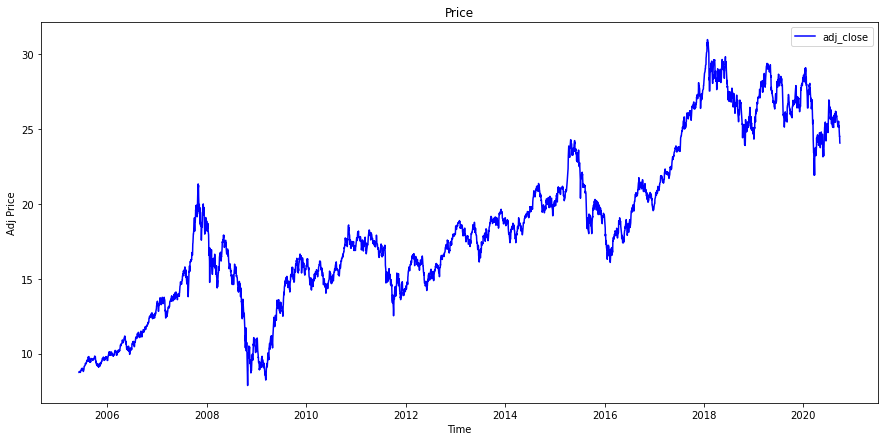

In [4]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(df.index, df['adjClose'], c = 'b', label = "adj_close")
ax.set(xlabel='Time', ylabel='Adj Price', title='Price')

plt.legend()

[Text(0, 0.5, 'RSI'), Text(0.5, 1.0, 'RSI')]

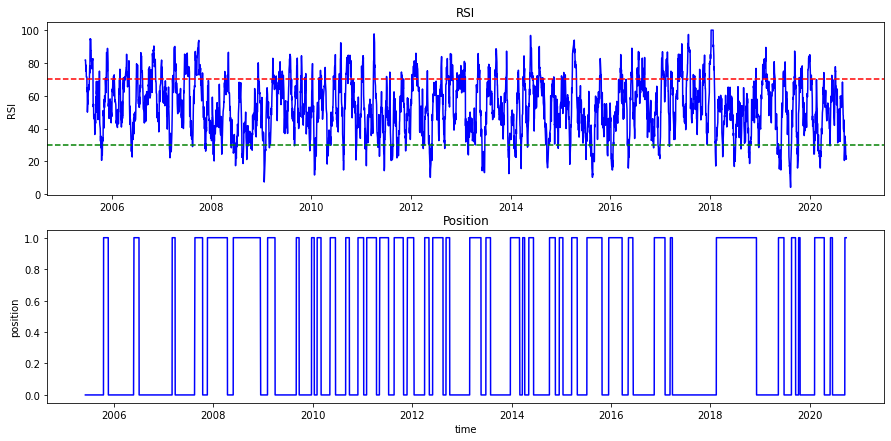

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,7))
ax2.plot(df.index, df['position'], c = 'b')
ax2.set(xlabel = 'time', ylabel = 'position', title = "Position")

ax1.plot(df.index, df["rsi"] , c = "b")
ax1.axhline(y= 30, c = 'g', linestyle = '--' )
ax1.axhline(y= 70, c = 'r', linestyle = '--' )
# ax1.axhline(y= 20, c = 'g', linestyle = '-.' )
# ax1.axhline(y= 80, c = 'g', linestyle = '-.' )
ax1.set(ylabel='RSI', title='RSI')

Total return of the strategy is:163.5%


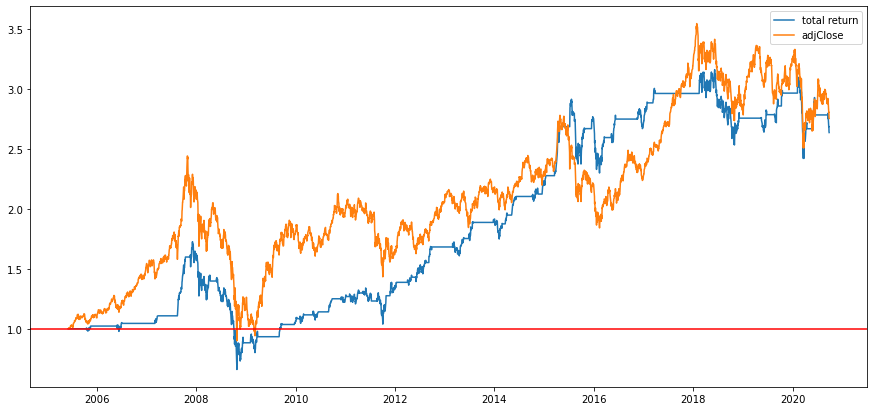

In [6]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(df.index, df["total_return"], label = "total return")
ax.plot(df.index, df["adjClose"] / df.iloc[0,0], label = 'adjClose')
ax.axhline(y = 1, c = 'r')
plt.legend()
print ("Total return of the strategy is:" + str(round((df.iloc[-1,-1] - 1) * 100, 2)) + '%')

In [7]:
# df.to_excel("output.xlsx")